In [9]:
import pandas as pd
import numpy as n

In [10]:
df = pd.read_csv('1629191345453_diabetes(1).csv', na_values = 0)

In [11]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,NaN
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,NaN
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
5,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30,NaN
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1.0
7,10.0,115.0,NaN,NaN,NaN,35.3,0.134,29,NaN
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1.0
9,8.0,125.0,96.0,NaN,NaN,NaN,0.232,54,1.0


In [12]:
df.isna().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,657.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,268.0
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,1.0
std,3.217291,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.0
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,1.0
25%,2.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,1.0
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,1.0
75%,7.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.0
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.0


In [14]:
df.dropna(subset = ['Glucose'], inplace = True)
# df.drop()
# df.drop(labels = [], axis = 0)

In [15]:
df['Pregnancies'].fillna(0, inplace = True)
df['Outcome'].fillna(0, inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)

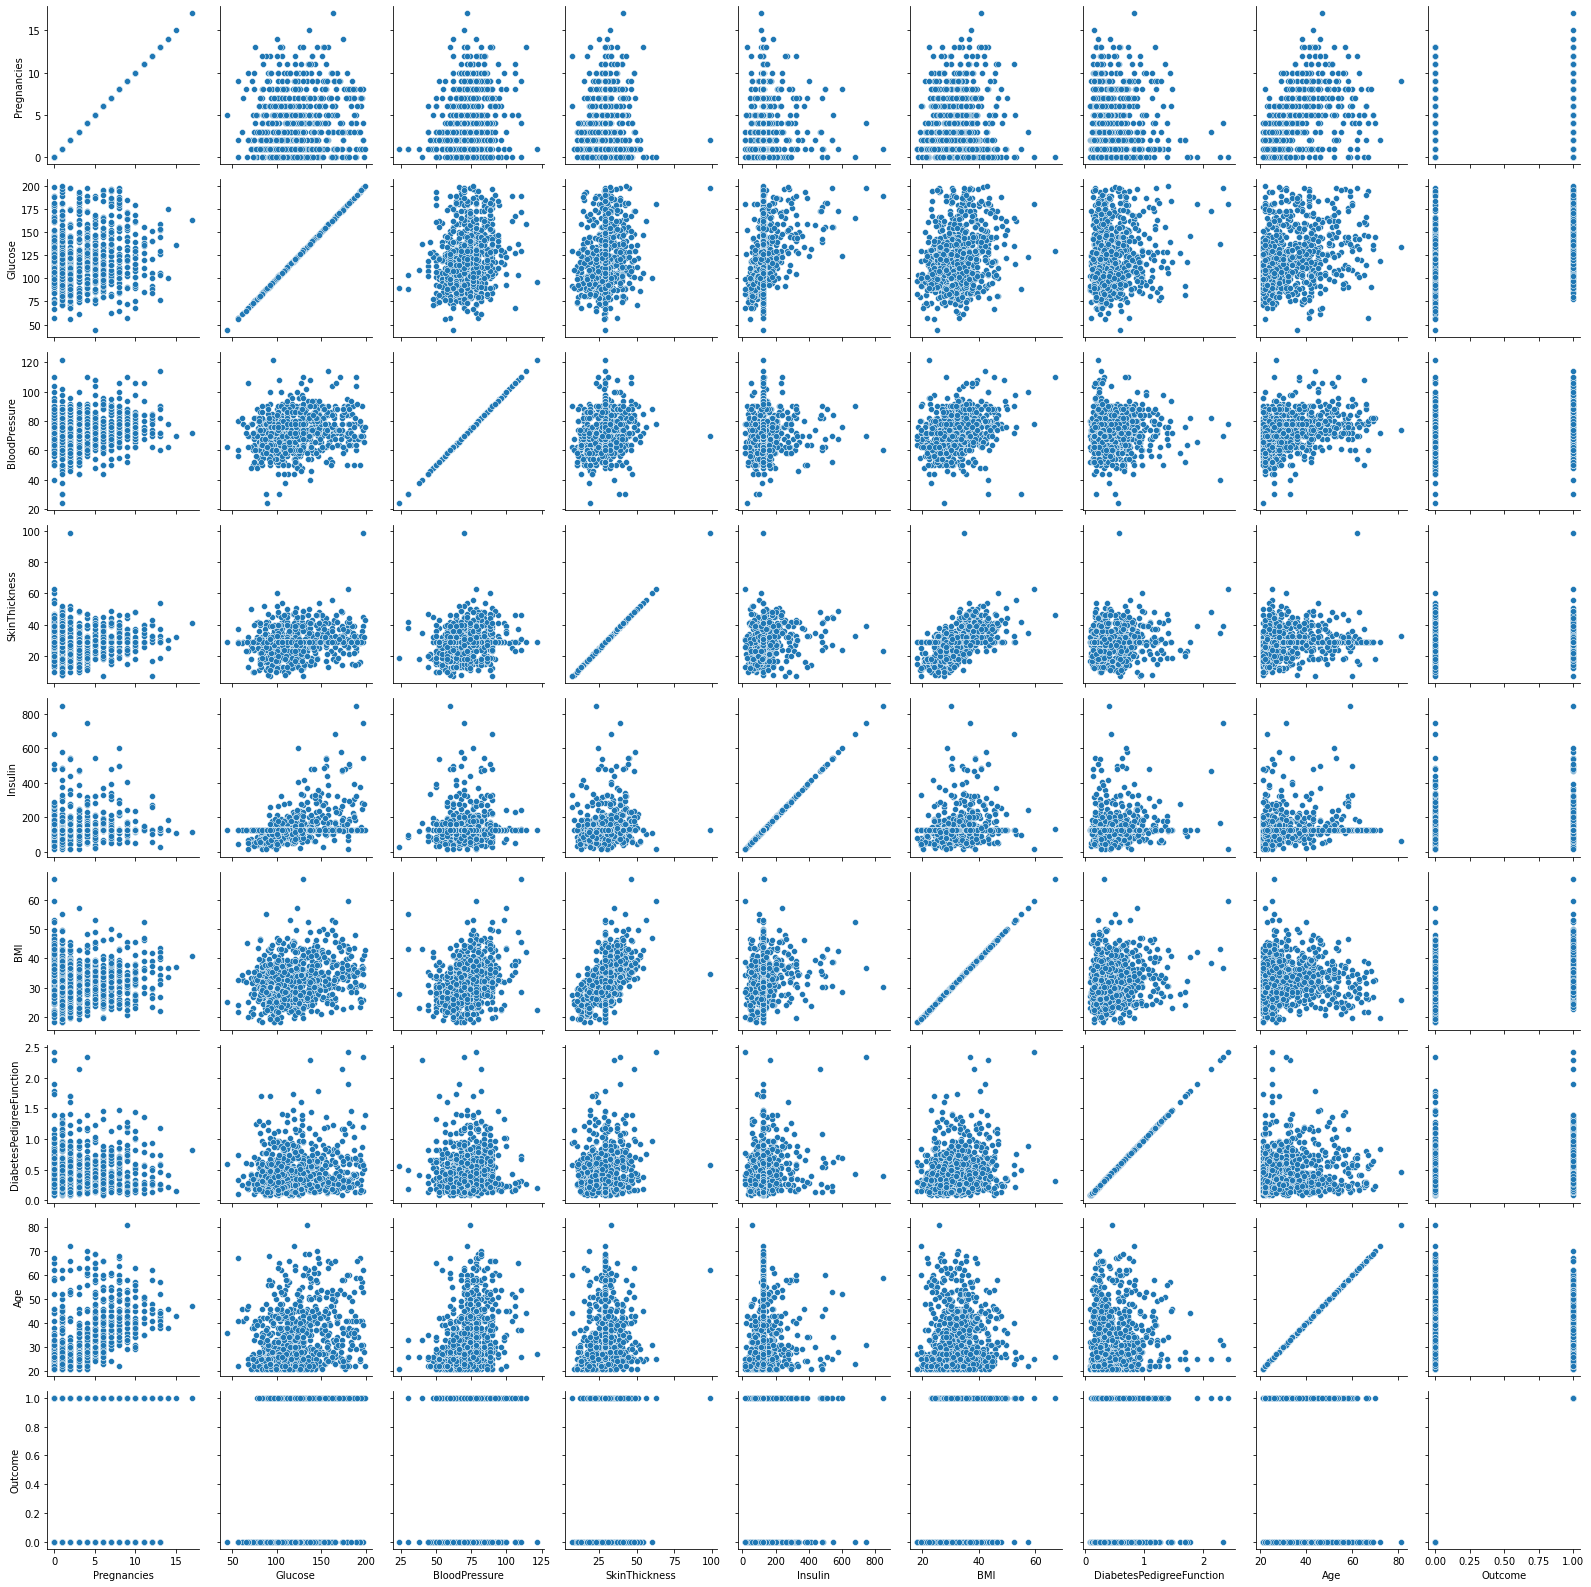

In [16]:
import seaborn as sn
g = sn.PairGrid(df)  # Visualising data to see outliers
g.map(sn.scatterplot)

In [17]:
# replacing outliers with median value:-
df['Insulin'] = n.where(df['Insulin'] > 500, df['Insulin'].median(), df['Insulin']) # replacing outliers with median
df['SkinThickness'] = n.where(df['SkinThickness'] > 50, df['SkinThickness'].median(), df['SkinThickness'])
df['Pregnancies'] = n.where(df['Pregnancies'] > 15, df['Pregnancies'].median(), df['Pregnancies'])

In [18]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.121987,0.209440,0.105762,0.066461,0.011646,-0.042133,0.541616,0.213572
Glucose,0.121987,1.000000,0.219236,0.177759,0.392475,0.231765,0.137246,0.267136,0.494650
BloodPressure,0.209440,0.219236,1.000000,0.196268,0.057149,0.279443,-0.004387,0.323907,0.164187
SkinThickness,0.105762,0.177759,0.196268,1.000000,0.170119,0.521172,0.061212,0.120225,0.214814
Insulin,0.066461,0.392475,0.057149,0.170119,1.000000,0.164141,0.101269,0.088326,0.206640
BMI,0.011646,0.231765,0.279443,0.521172,0.164141,1.000000,0.151755,0.021944,0.308250
DiabetesPedigreeFunction,-0.042133,0.137246,-0.004387,0.061212,0.101269,0.151755,1.000000,0.030896,0.172292
Age,0.541616,0.267136,0.323907,0.120225,0.088326,0.021944,0.030896,1.000000,0.235145
Outcome,0.213572,0.494650,0.164187,0.214814,0.206640,0.308250,0.172292,0.235145,1.000000


<AxesSubplot:>

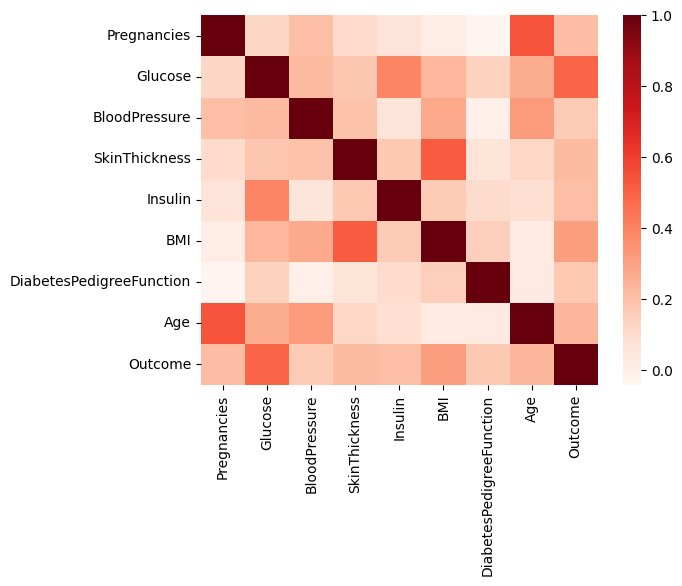

In [19]:
sn.heatmap(df.corr(), cmap = 'Reds') # Creating a correlation matrix to find features with some correlation

In [20]:
# df['Insulin/Glucose'] = df['Insulin']/df['Glucose']
# df['Pregnancies/Age'] = df['Pregnancies']/df['Age']
# df.drop(columns = ['Glucose', 'Insulin', 'Pregnancies', 'Age'], inplace = True)

In [21]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,0.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0
5,5.0,116.0,74.0,29.0,125.0,25.6,0.201,30,0.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1.0
7,10.0,115.0,72.0,29.0,125.0,35.3,0.134,29,0.0
8,2.0,197.0,70.0,45.0,125.0,30.5,0.158,53,1.0
9,8.0,125.0,96.0,29.0,125.0,32.3,0.232,54,1.0


In [22]:
x = df.drop(labels = ['Outcome'], axis = 1)
y = df['Outcome']

In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .20, random_state = 6)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [25]:
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [26]:
pred = knn.predict(xtest)
score = accuracy_score(ytest, pred)

In [27]:
# print(f'\nThe prediction by KNeighborsClassifier is :\n{pred}') # uncomment if you wish to see the predicted target values
# print(f'\nThe actual target values were :\n{ytest}') # uncomment if you wish to see the actual target values
print(f'\nThe prediction by KNeighborsClassifier is {score * 100:.2f}% accurate, that is, it has a score of {score:.4f}')


The prediction by KNeighborsClassifier is 78.43% accurate, that is, it has a score of 0.7843


In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 400)
rf.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=400)

In [29]:
pred = rf.predict(xtest)
score1 = accuracy_score(ytest, pred)

In [30]:
# print(f'\nThe prediction by RandomForestClassifier is :\n{pred}') # uncomment if you wish to see the predicted target values
# print(f'\nThe actual target values were :\n{ytest}') # uncomment if you wish to see the actual target values
print(f'\nThe prediction by RandomForestClassifier is {score1 * 100:.2f}% accurate, that is, it has a score of {score1:.4f}')


The prediction by RandomForestClassifier is 83.66% accurate, that is, it has a score of 0.8366


In [31]:
print(f'\nThe difference between the accuracy score of RandomForestClassifier and KNeighborsClassifier is : {(score1-score):.2f}')


The difference between the accuracy score of RandomForestClassifier and KNeighborsClassifier is : 0.05
